<a href="https://colab.research.google.com/github/BarryLiu-97/Python/blob/master/pandas_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

导入pandas模块，类似于numpy的字典版

In [0]:
import numpy as np

pandas与numpy经常一起使用

In [5]:
s = pd.Series([1,3,6,np.nan,44,1])
print(s)

0     1.0
1     3.0
2     6.0
3     NaN
4    44.0
5     1.0
dtype: float64


In [8]:
dates = pd.date_range('20200515',periods=6)
print(dates)

DatetimeIndex(['2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18',
               '2020-05-19', '2020-05-20'],
              dtype='datetime64[ns]', freq='D')


In [11]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
print(df)

                   a         b         c         d
2020-05-15  1.556668  1.261112 -1.180447 -1.021968
2020-05-16 -2.863765 -1.027614 -1.006206 -0.197720
2020-05-17 -1.250576 -0.179349 -1.055712 -0.399088
2020-05-18 -1.442735 -0.593896 -2.221345 -0.448914
2020-05-19  0.279004  0.019987  0.829631  2.379565
2020-05-20  0.393627  2.419696 -0.239674  0.913715


index为行名，columns为列名

In [12]:
df_1 = pd.DataFrame(np.arange(12).reshape((3,4)))
print(df_1)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


行和列的默认命名方式

In [19]:
df_2 = pd.DataFrame({'A':1.,
          'B':pd.Timestamp('20200515'),
          'C':pd.Series(1,index=list(range(4)),dtype='float32'),
          'D':np.array([3]*4,dtype='int32'),
          'E':pd.Categorical(["test","train","test","train"]),
          'F':'foo'})
print(df_2, '\n' ,df_2.dtypes, '\n' ,df_2.index, '\n', df_2.columns, '\n', df_2.values)

     A          B    C  D      E    F
0  1.0 2020-05-15  1.0  3   test  foo
1  1.0 2020-05-15  1.0  3  train  foo
2  1.0 2020-05-15  1.0  3   test  foo
3  1.0 2020-05-15  1.0  3  train  foo 
 A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object 
 Int64Index([0, 1, 2, 3], dtype='int64') 
 Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object') 
 [[1.0 Timestamp('2020-05-15 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2020-05-15 00:00:00') 1.0 3 'train' 'foo']
 [1.0 Timestamp('2020-05-15 00:00:00') 1.0 3 'test' 'foo']
 [1.0 Timestamp('2020-05-15 00:00:00') 1.0 3 'train' 'foo']]


一列一列地输入数据来生成DataFrame

In [21]:
print(df_2.describe())

         A    C    D
count  4.0  4.0  4.0
mean   1.0  1.0  3.0
std    0.0  0.0  0.0
min    1.0  1.0  3.0
25%    1.0  1.0  3.0
50%    1.0  1.0  3.0
75%    1.0  1.0  3.0
max    1.0  1.0  3.0


只会计算数值的相应值，所以B和E忽略

In [22]:
print(df_2.T)

                     0  ...                    3
A                    1  ...                    1
B  2020-05-15 00:00:00  ...  2020-05-15 00:00:00
C                    1  ...                    1
D                    3  ...                    3
E                 test  ...                train
F                  foo  ...                  foo

[6 rows x 4 columns]


In [24]:
print(df_2.sort_index(axis=1,ascending=False))
print(df_2.sort_index(axis=0,ascending=False))

     F      E  D    C          B    A
0  foo   test  3  1.0 2020-05-15  1.0
1  foo  train  3  1.0 2020-05-15  1.0
2  foo   test  3  1.0 2020-05-15  1.0
3  foo  train  3  1.0 2020-05-15  1.0
     A          B    C  D      E    F
3  1.0 2020-05-15  1.0  3  train  foo
2  1.0 2020-05-15  1.0  3   test  foo
1  1.0 2020-05-15  1.0  3  train  foo
0  1.0 2020-05-15  1.0  3   test  foo


axis=1则对A、B、C、D、E、F进行排序，axis=0则对0、1、2、3进行排序，ascending=False表示倒序


In [25]:
print(df_2.sort_values(by='E'))

     A          B    C  D      E    F
0  1.0 2020-05-15  1.0  3   test  foo
2  1.0 2020-05-15  1.0  3   test  foo
1  1.0 2020-05-15  1.0  3  train  foo
3  1.0 2020-05-15  1.0  3  train  foo


对E列的值进行排序

In [26]:
df_3 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df_3)

             A   B   C   D
2020-05-15   0   1   2   3
2020-05-16   4   5   6   7
2020-05-17   8   9  10  11
2020-05-18  12  13  14  15
2020-05-19  16  17  18  19
2020-05-20  20  21  22  23


In [37]:
print(df_3[['A','B']])
print(df_3.A)

             A   B
2020-05-15   0   1
2020-05-16   4   5
2020-05-17   8   9
2020-05-18  12  13
2020-05-19  16  17
2020-05-20  20  21
2020-05-15     0
2020-05-16     4
2020-05-17     8
2020-05-18    12
2020-05-19    16
2020-05-20    20
Freq: D, Name: A, dtype: int64


In [28]:
print(df_3[0:3])
print(df_3['20200515':'20200518'])

            A  B   C   D
2020-05-15  0  1   2   3
2020-05-16  4  5   6   7
2020-05-17  8  9  10  11
             A   B   C   D
2020-05-15   0   1   2   3
2020-05-16   4   5   6   7
2020-05-17   8   9  10  11
2020-05-18  12  13  14  15


In [43]:
print(df_3.loc['20200516'])
print(df_3.loc[:,['A','B']])

A    4
B    5
C    6
D    7
Name: 2020-05-16 00:00:00, dtype: int64
             A   B
2020-05-15   0   1
2020-05-16   4   5
2020-05-17   8   9
2020-05-18  12  13
2020-05-19  16  17
2020-05-20  20  21


使用行名列名进行索引

In [46]:
print(df_3.iloc[3:5,1:3])
print(df_3.iloc[[1,3,5],1:3])

             B   C
2020-05-18  13  14
2020-05-19  17  18
             B   C
2020-05-16   5   6
2020-05-18  13  14
2020-05-20  21  22


使用位置进行索引

自pandas 1.0.0已经删除DataFrame.ix的索引方式

In [54]:
print(df_3[df_3.A>8])

             A   B   C   D
2020-05-18  12  13  14  15
2020-05-19  16  17  18  19
2020-05-20  20  21  22  23


找出A列元素值大于8的DataFrame

In [56]:
df_3.iloc[2,2] = 111
print(df_3)
df_3.loc['20200515','B'] = 222
print(df_3)

             A   B    C   D
2020-05-15   0   1    2   3
2020-05-16   4   5    6   7
2020-05-17   8   9  111  11
2020-05-18  12  13   14  15
2020-05-19  16  17   18  19
2020-05-20  20  21   22  23
             A    B    C   D
2020-05-15   0  222    2   3
2020-05-16   4    5    6   7
2020-05-17   8    9  111  11
2020-05-18  12   13   14  15
2020-05-19  16   17   18  19
2020-05-20  20   21   22  23


In [60]:
df_3[df_3.A>4] = 0
print(df_3)
df_3 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
df_3.A[df_3.A>4] = 0
print(df_3)
df_3['F'] = np.nan
print(df_3)

            A   B   C   D
2020-05-15  0   1   2   3
2020-05-16  4   5   6   7
2020-05-17  0   9  10  11
2020-05-18  0  13  14  15
2020-05-19  0  17  18  19
2020-05-20  0  21  22  23
            A   B   C   D
2020-05-15  0   1   2   3
2020-05-16  4   5   6   7
2020-05-17  0   9  10  11
2020-05-18  0  13  14  15
2020-05-19  0  17  18  19
2020-05-20  0  21  22  23
            A   B   C   D   F
2020-05-15  0   1   2   3 NaN
2020-05-16  4   5   6   7 NaN
2020-05-17  0   9  10  11 NaN
2020-05-18  0  13  14  15 NaN
2020-05-19  0  17  18  19 NaN
2020-05-20  0  21  22  23 NaN


添加空的列

In [61]:
df_3['E'] = pd.Series([1,2,3,4,5,6],index=pd.date_range('20200515',periods=6))
print(df_3)

            A   B   C   D   F  E
2020-05-15  0   1   2   3 NaN  1
2020-05-16  4   5   6   7 NaN  2
2020-05-17  0   9  10  11 NaN  3
2020-05-18  0  13  14  15 NaN  4
2020-05-19  0  17  18  19 NaN  5
2020-05-20  0  21  22  23 NaN  6


预先定义好要添加的列

In [63]:
df_3 = pd.DataFrame(np.arange(24).reshape((6,4)),index=dates,columns=['A','B','C','D'])
print(df_3)
df_3.iloc[0,1] = np.nan
df_3.iloc[1,2] = np.nan
print(df_3)

             A   B   C   D
2020-05-15   0   1   2   3
2020-05-16   4   5   6   7
2020-05-17   8   9  10  11
2020-05-18  12  13  14  15
2020-05-19  16  17  18  19
2020-05-20  20  21  22  23
             A     B     C   D
2020-05-15   0   NaN   2.0   3
2020-05-16   4   5.0   NaN   7
2020-05-17   8   9.0  10.0  11
2020-05-18  12  13.0  14.0  15
2020-05-19  16  17.0  18.0  19
2020-05-20  20  21.0  22.0  23


In [64]:
print(df_3.dropna(axis=0,how='any')) # how = {'any','all'}

             A     B     C   D
2020-05-17   8   9.0  10.0  11
2020-05-18  12  13.0  14.0  15
2020-05-19  16  17.0  18.0  19
2020-05-20  20  21.0  22.0  23


axis=0表示按行丢弃，axis=1表示按列丢弃
any表示有一个非数就全部删除，all表示全部非数才丢掉

In [68]:
print(df_3.fillna(value=0))

             A     B     C   D
2020-05-15   0   0.0   2.0   3
2020-05-16   4   5.0   0.0   7
2020-05-17   8   9.0  10.0  11
2020-05-18  12  13.0  14.0  15
2020-05-19  16  17.0  18.0  19
2020-05-20  20  21.0  22.0  23


非数部分填充为0

In [75]:
print(df_3.isnull())
print(np.any(df_3.isnull()) == True)

                A      B      C      D
2020-05-15  False   True  False  False
2020-05-16  False  False   True  False
2020-05-17  False  False  False  False
2020-05-18  False  False  False  False
2020-05-19  False  False  False  False
2020-05-20  False  False  False  False
True


查找是否有缺失的数据

In [0]:
data = pd.read_csv('test.csv')
print(data)
data.to_pickle('test_2.pickle')

也可以读取txt

In [94]:
df_4 = pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'])
df_5 = pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'])
df_6 = pd.DataFrame(np.ones((3,4))*2,columns=['a','b','c','d'])
print(df_4)
print(df_5)
print(df_6)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [80]:
res_1 = pd.concat([df_4,df_5,df_6],axis=0)
print(res_1)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


axis=0竖向合并 axis=1横向合并   此处可见行名没变

In [84]:
res_1 = pd.concat([df_4,df_5,df_6],axis=0, ignore_index = True)
print(res_1)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  2.0  2.0  2.0  2.0
7  2.0  2.0  2.0  2.0
8  2.0  2.0  2.0  2.0


In [89]:
df_7 = pd.DataFrame(np.ones((3,4))*1,columns=['b','c','d','e'])
print(df_7)

     b    c    d    e
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0


In [90]:
res_2 = pd.concat([df_4,df_7])
print(res_2)

     a    b    c    d    e
0  0.0  0.0  0.0  0.0  NaN
1  0.0  0.0  0.0  0.0  NaN
2  0.0  0.0  0.0  0.0  NaN
0  NaN  1.0  1.0  1.0  1.0
1  NaN  1.0  1.0  1.0  1.0
2  NaN  1.0  1.0  1.0  1.0


默认的join模式：'outer'

In [93]:
res_3 = pd.concat([df_4,df_7],join='inner',ignore_index=True)
print(res_3)

     b    c    d
0  0.0  0.0  0.0
1  0.0  0.0  0.0
2  0.0  0.0  0.0
3  1.0  1.0  1.0
4  1.0  1.0  1.0
5  1.0  1.0  1.0


只保留相同部分

In [0]:
df_8 = pd.DataFrame(np.ones((3,4))*0,columns=['a','b','c','d'],index=[1,2,3])
df_9 = pd.DataFrame(np.ones((3,4))*1,columns=['a','b','c','d'],index=[2,3,4])
res_4 = pd.concat([df_8,df_9],axis=1,join_axes=[df_8.index])
print(res_4)

join_axes已过期

In [100]:
res_5 = df_4.append([df_5,df_5],ignore_index=True)
print(res_5)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0
5  1.0  1.0  1.0  1.0
6  1.0  1.0  1.0  1.0
7  1.0  1.0  1.0  1.0
8  1.0  1.0  1.0  1.0


In [104]:
s1 = pd.Series([1,2,3,4],index=['a','b','c','d'])
res_6 = df_4.append(s1,ignore_index=True)
print(res_6)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  1.0  2.0  3.0  4.0


一条数据一条数据添加

In [106]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
            'A':['A0','A1','A2','A3'],
            'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
            'C':['C0','C1','C2','C3'],
            'D':['D0','D1','D2','D3']})
print(left)
print(right)

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2
3  K3  A3  B3
  key   C   D
0  K0  C0  D0
1  K1  C1  D1
2  K2  C2  D2
3  K3  C3  D3


In [107]:
res_7 = pd.merge(left,right,on='key')
print(res_7)

  key   A   B   C   D
0  K0  A0  B0  C0  D0
1  K1  A1  B1  C1  D1
2  K2  A2  B2  C2  D2
3  K3  A3  B3  C3  D3


In [108]:
left_1 = pd.DataFrame({'key1':['K0','K0','K1','K2'],
             'key2':['K0','K1','K0','K1'],
             'A':['A0','A1','A2','A3'],
             'B':['B0','B1','B2','B3']})
right_1 = pd.DataFrame({'key1':['K0','K1','K1','K2'],
             'key2':['K0','K0','K0','K0'],
             'C':['C0','C1','C2','C3'],
             'D':['D0','D1','D2','D3']})
print(left_1)
print(right_1)

  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


In [115]:
res_8 = pd.merge(left_1,right_1,on=['key1','key2'])
print(res_8)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


merge默认是inner，只考虑共有的部分
how = ['left','right','outer','inner']
若将参数indicator设置为True可显示以何种方式合并，如left only, both

In [117]:
left_2 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
            'B': ['B0', 'B1', 'B2']},
            index=['K0', 'K1', 'K2'])
right_2 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
            'D': ['D0', 'D2', 'D3']},
            index=['K0', 'K2', 'K3'])
print(left_2)
print(right_2)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


In [118]:
res_9 = pd.merge(left_2,right_2,left_index=True,right_index=True,how='outer')
print(res_9)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


以index为参照进行合并，而不是column

In [119]:
res_10 = pd.merge(left_2,right_2,left_index=True,right_index=True,how='inner')
print(res_10)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


In [120]:
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)
res_x = pd.merge(boys,girls,on='k',suffixes=['_boys','_girls'],how='outer')
print(res_x)

    k  age
0  K0    1
1  K1    2
2  K2    3
    k  age
0  K0    4
1  K0    5
2  K3    6
    k  age_boys  age_girls
0  K0       1.0        4.0
1  K0       1.0        5.0
2  K1       2.0        NaN
3  K2       3.0        NaN
4  K3       NaN        6.0


<function matplotlib.pyplot.show>

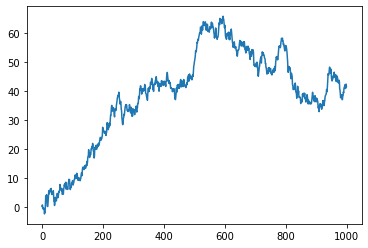

In [121]:
import matplotlib.pyplot as plt
data = pd.Series(np.random.randn(1000),index=np.arange(1000))
data = data.cumsum()
data.plot()
plt.show

          A         B         C         D
0  1.794202  0.427483  0.160880 -0.240897
1 -0.688942 -1.428203 -2.475727  1.436183
2 -0.786826 -1.801730 -1.724973  0.357130
3  0.105257 -2.289716 -2.716860 -0.172215
4 -0.697202 -2.388529 -3.613735  0.927451


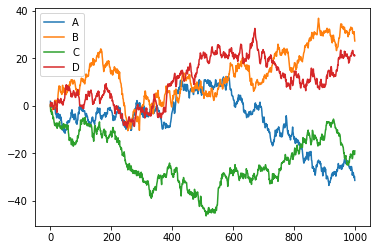

In [124]:
data_2 = pd.DataFrame(np.random.randn(1000,4),
            index=np.arange(1000),
            columns=list("ABCD"))
data_2 = data_2.cumsum()
print(data_2.head())
data_2.plot()
plt.show()

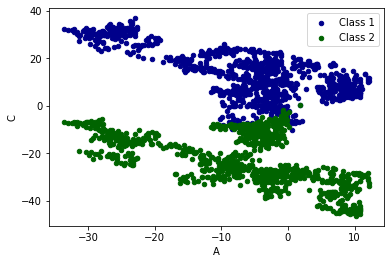

In [125]:
ax = data_2.plot.scatter(x='A',y='B',color='DarkBlue',label='Class 1')
data_2.plot.scatter(x='A',y='C',color='DarkGreen',label='Class 2', ax=ax)  #ax=ax使得一张画布上可以画两组scatter
plt.show()

plot method: 'bar', 'box', 'kde', 'area', 'scatter', 'hexbin', 'pie' 